<a href="https://colab.research.google.com/github/Haderob/Data-mining/blob/main/Bank_portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder

Data Collection and Processing

In [5]:
# loading the data from csv file to Pandas DataFrame
bank_data = pd.read_csv("bank.csv")

In [6]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank_data.shape

(4521, 17)

### Check unique value

In [8]:
n_categories = bank_data['job'].nunique()
print(f"Number of categories in 'Job': {n_categories}")

categories = bank_data['job'].unique()
print(f"Number of categories in 'Job': {categories}")

categories = bank_data['marital'].unique()
print(f"Number of categories in 'marital': {categories}")

categories = bank_data['education'].unique()
print(f"Number of categories in 'education': {categories}")

categories = bank_data['default'].unique()
print(f"Number of categories in 'default': {categories}")

categories = bank_data['housing'].unique()
print(f"Number of categories in 'housing': {categories}")

categories = bank_data['loan'].unique()
print(f"Number of categories in 'loan': {categories}")

Number of categories in 'Job': 12
Number of categories in 'Job': ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
Number of categories in 'marital': ['married' 'single' 'divorced']
Number of categories in 'education': ['primary' 'secondary' 'tertiary' 'unknown']
Number of categories in 'default': ['no' 'yes']
Number of categories in 'housing': ['no' 'yes']
Number of categories in 'loan': ['no' 'yes']


In [9]:
categories = bank_data['contact'].unique()
print(f"Number of categories in 'contact': {categories}")

# Get the mode of a specific column
mode = bank_data['contact'].mode()[0]  # Access the first element of the Series

# Print the result
print(f"Mode of 'contact': {mode}")

Number of categories in 'contact': ['cellular' 'unknown' 'telephone']
Mode of 'contact': cellular


In [10]:
# first 5 rows of the dataframe
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# One Hot Encoder

In [11]:


# Specify the column to encode
columns_to_encode = ['education', 'job', 'marital', 'contact', 'poutcome', 'month']  # Include desired columns for encoding


# One-hot encode the chosen column
encoder = OneHotEncoder(sparse=False)  # Set sparse=False for dense output
encoded_df = pd.get_dummies(bank_data, columns=columns_to_encode)

# Print the encoded DataFrame
print(encoded_df)

      age default  balance housing loan  day  duration  campaign  pdays  \
0      30      no     1787      no   no   19        79         1     -1   
1      33      no     4789     yes  yes   11       220         1    339   
2      35      no     1350     yes   no   16       185         1    330   
3      30      no     1476     yes  yes    3       199         4     -1   
4      59      no        0     yes   no    5       226         1     -1   
...   ...     ...      ...     ...  ...  ...       ...       ...    ...   
4516   33      no     -333     yes   no   30       329         5     -1   
4517   57     yes    -3313     yes  yes    9       153         1     -1   
4518   57      no      295      no   no   19       151        11     -1   
4519   28      no     1137      no   no    6       129         4    211   
4520   44      no     1136     yes  yes    3       345         2    249   

      previous  ... month_dec  month_feb  month_jan  month_jul  month_jun  \
0            0  ...   

In [12]:
# first 5 rows of the dataframe
encoded_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,no,1787,no,no,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,no,4789,yes,yes,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,no,1350,yes,no,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,no,1476,yes,yes,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,no,0,yes,no,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


# 0, 1 Encoder for 'yes' and 'no'

In [13]:
# label encoding
encoded_df.replace({"default":{'no':0,'yes':1}},inplace=True)
# label encoding
encoded_df.replace({"housing":{'no':0,'yes':1}},inplace=True)
# label encoding
encoded_df.replace({"loan":{'no':0,'yes':1}},inplace=True)
# label encoding
encoded_df.replace({"y":{'no':0,'yes':1}},inplace=True)

In [14]:
# Drop the column (modifies the original DataFrame)
encoded_df.drop('day', axis=1, inplace=True)

In [15]:
X = encoded_df.drop(columns=['y'],axis=1)
Y = encoded_df['y']

In [16]:
X.shape

(4521, 47)

In [17]:
Y.shape

(4521,)

In [18]:
print(X)
print(Y)

      age  default  balance  housing  loan  duration  campaign  pdays  \
0      30        0     1787        0     0        79         1     -1   
1      33        0     4789        1     1       220         1    339   
2      35        0     1350        1     0       185         1    330   
3      30        0     1476        1     1       199         4     -1   
4      59        0        0        1     0       226         1     -1   
...   ...      ...      ...      ...   ...       ...       ...    ...   
4516   33        0     -333        1     0       329         5     -1   
4517   57        1    -3313        1     1       153         1     -1   
4518   57        0      295        0     0       151        11     -1   
4519   28        0     1137        0     0       129         4    211   
4520   44        0     1136        1     1       345         2    249   

      previous  education_primary  ...  month_dec  month_feb  month_jan  \
0            0                  1  ...          

In [19]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(4521, 47) (4068, 47) (453, 47)


# Training the model:

Support Vector Machine Model

In [28]:
classifier = svm.SVC(kernel='linear')

In [40]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [41]:
from sklearn.metrics import accuracy_score

Model Evaluation

In [42]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [43]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.893559488692232


In [44]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [45]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8653421633554084


# Save the Model

In [46]:
import pickle

# Open a file in binary write mode for saving the model
with open("trained_model_SVM.pkl", "wb") as f:
    # Use pickle.dump to serialize the model object and write it to the file
    pickle.dump(classifier, f)

print("Model saved successfully to trained_model_SVM.pkl")

Model saved successfully to trained_model_SVM.pkl


In [49]:
with open("trained_model_SVM.pkl", "rb") as f:
    model_loaded_svm = pickle.load(f)

In [50]:
y_pred = model_loaded_svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8653421633554084


# Random forest classifier


In [21]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier()
from sklearn.metrics import accuracy_score

In [22]:
modelRF.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [23]:
# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [24]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8962472406181016


# Save the Model

In [26]:
import pickle
# Open a file in binary write mode for saving the model
with open("trained_model_Random_forest.pkl", "wb") as f:
    # Use pickle.dump to serialize the model object and write it to the file
    pickle.dump(modelRF, f)

print("Model saved successfully to trained_model_Random_forest.pkl")

Model saved successfully to trained_model_Random_forest.pkl


In [27]:
with open("trained_model_Random_forest.pkl", "rb") as f:
    model_loaded = pickle.load(f)

In [28]:
y_pred = model_loaded.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8962472406181016


# Data Visualization

In [ ]:
# first 5 rows of the dataframe
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['balance'].plot(kind='hist', bins=20, title='balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('housing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='age', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='balance', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='day', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('job')):
  _plot_series(series, series_name, i)
  fig.legend(title='job', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('marital')):
  _plot_series(series, series_name, i)
  fig.legend(title='marital', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('education')):
  _plot_series(series, series_name, i)
  fig.legend(title='education', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('housing')):
  _plot_series(series, series_name, i)
  fig.legend(title='housing', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['balance'].plot(kind='line', figsize=(8, 4), title='balance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['marital'].value_counts()
    for x_label, grp in _df_20.groupby('job')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('job')
_ = plt.ylabel('marital')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education'].value_counts()
    for x_label, grp in _df_21.groupby('marital')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital')
_ = plt.ylabel('education')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['housing'].value_counts()
    for x_label, grp in _df_22.groupby('education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('education')
_ = plt.ylabel('housing')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['loan'].value_counts()
    for x_label, grp in _df_23.groupby('housing')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('housing')
_ = plt.ylabel('loan')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['job'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='job', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['marital'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='marital', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['housing'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='housing', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-37-0544b63d8deb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_26, x='index', y='education', inner='stick', palette='Dark2')


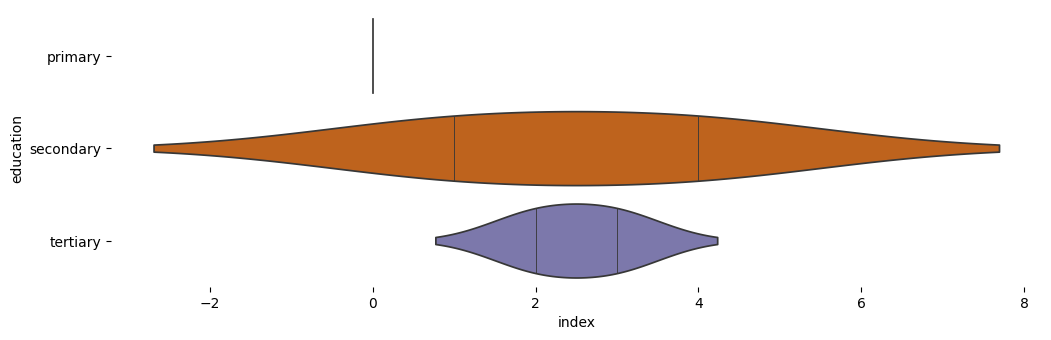

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-36-80a1a63a7d47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_24, x='index', y='job', inner='stick', palette='Dark2')


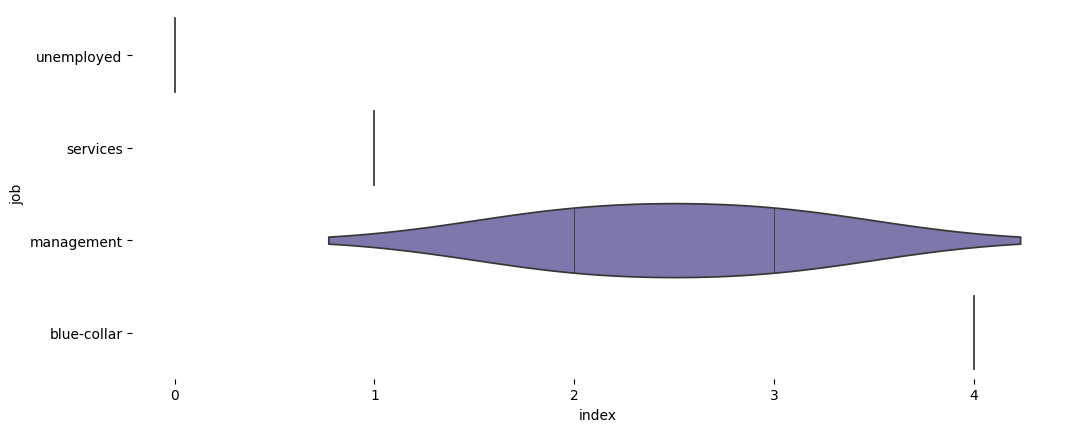

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['job'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='job', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

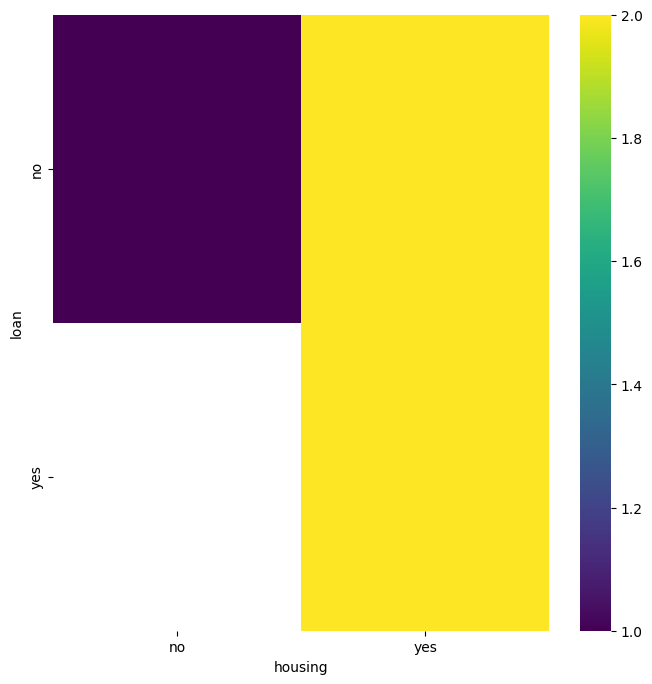

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['loan'].value_counts()
    for x_label, grp in _df_23.groupby('housing')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('housing')
_ = plt.ylabel('loan')

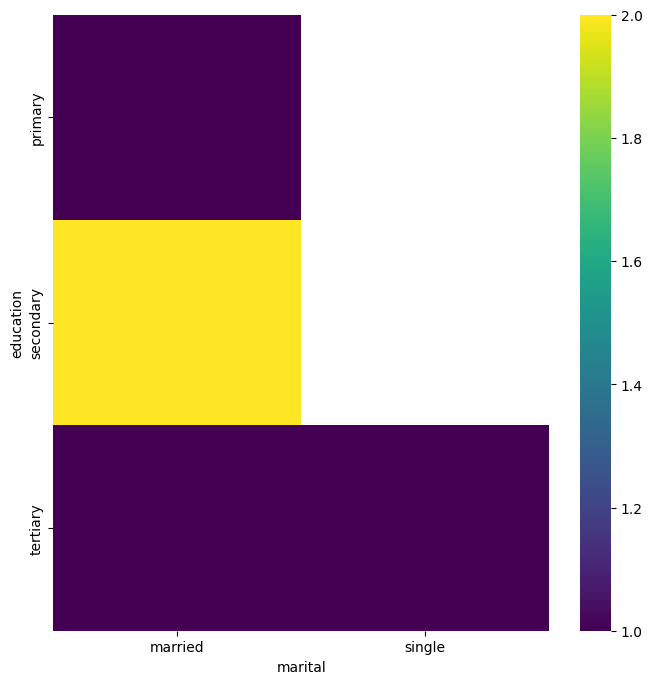

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education'].value_counts()
    for x_label, grp in _df_21.groupby('marital')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital')
_ = plt.ylabel('education')

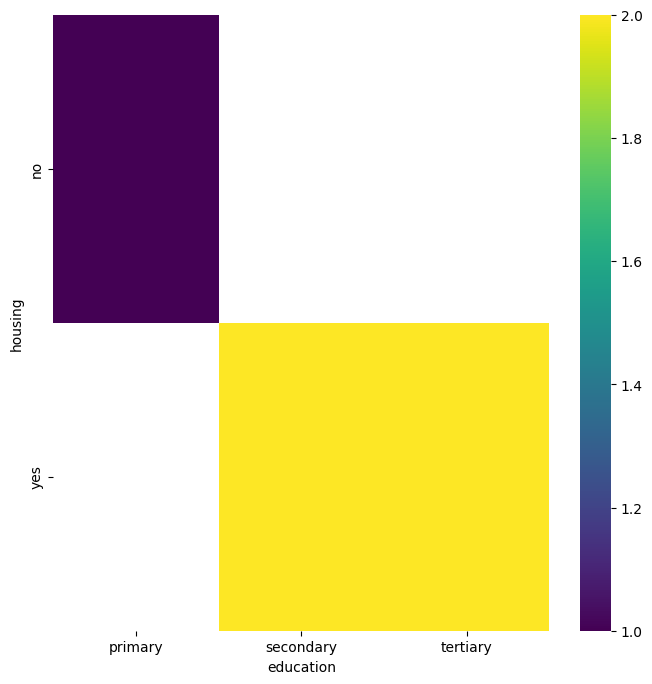

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['housing'].value_counts()
    for x_label, grp in _df_22.groupby('education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('education')
_ = plt.ylabel('housing')

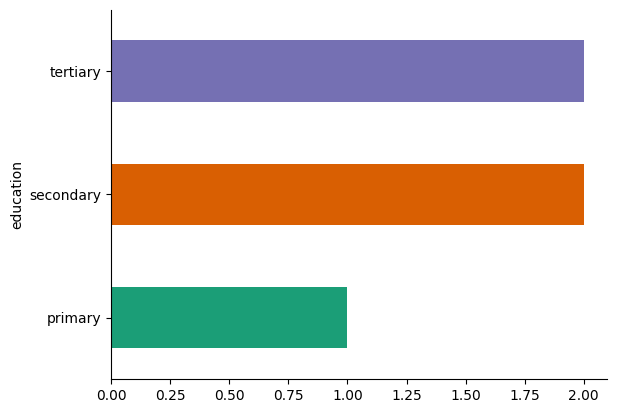

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

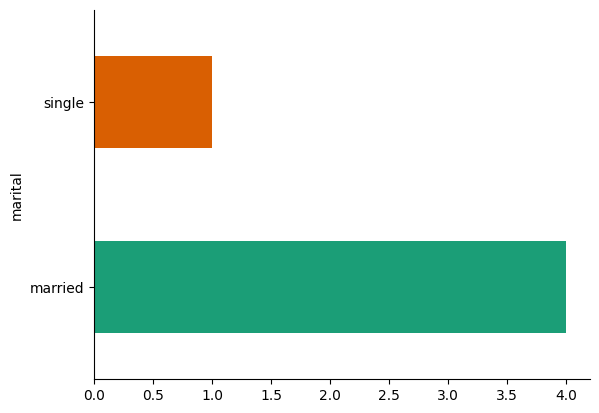

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

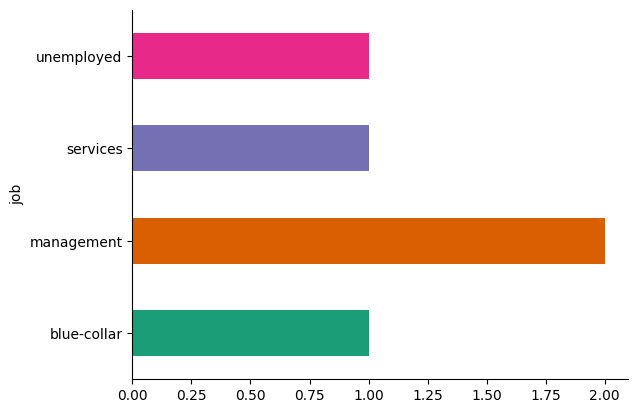

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [34]:
import pickle

# Assuming your trained model is stored in a variable named `model`

# Open a file in binary write mode for saving the model
with open("trained_model_Random_forest.pkl", "wb") as f:
    # Use pickle.dump to serialize the model object and write it to the file
    pickle.dump(modelRF, f)

print("Model saved successfully to trained_model.pkl")

Model saved successfully to trained_model.pkl


In [35]:
with open("trained_model_Random_forest.pkl", "rb") as f:
    model_loaded = pickle.load(f)

In [36]:
y_pred = model_loaded.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8852097130242825


In [ ]:
import pickle

# Replace "model.pkl" with the actual filename of your trained model
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

print("Model downloaded successfully!")

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'